# Analysis of the number of quotes per topic and per year

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

In [ ]:
!pip install pandas==1.0.5

In [1]:
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import bz2
import json
from urllib.parse import urlparse
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import os
import glob
import pickle
import math
import itertools

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# The chosen key words
words_immigration = 'immigration|mexic|migrant|border|refugees'
words_terrorism = 'shoot|gun|kill|attack|massacre|victim|terroris|arm|\
                  violen|death'
words_ClimateChange = 'flood|greenhouse effect|co2|global warming|pollution|\
                  glacier|ice pake melting|high temperatures|heat'
words_abortion = 'abort|fetus'
words_religion = 'god|christian|christianism|belief|faith|prayer|commitment|\
            islam|buddhism|hinduism|baptism|church|vatican|reincarnation|jesus'
words_racism = 'hispanic|black|black lives matter|all lives matter|\
      discrimination|segregation|george floyd|slaver|white supremacy|\
      klu klux klan|kkk|gunshot|trials|police|death sentence|woke'

lista = [words_immigration, words_terrorism, words_ClimateChange, \
         words_abortion, words_religion, words_racism]
lista2 = ['immigration', 'terrorism', 'climate change', 'abortion', 'religion', 'racism']

In [3]:
# Reading the data and calculating the mean number of quotes containing the 
# chosen topics per newspaper

years = [2015, 2016, 2017, 2018, 2019, 2020]
PATH = '/content/drive/Shareddrives/ADA/Quotations_Fox_NY/'

# Initialisation of the DataFrames
df_meanFox = pd.DataFrame(index=range(len(years)), columns=lista2)
df_meanNy = pd.DataFrame(index=range(len(years)), columns=lista2)
count = 0

for y in years: # Reading the data for each year
  df_yfox = pd.read_pickle(PATH + str(y) + '_' + 'Fox_quotations.pkl')
  df_yNy = pd.read_pickle(PATH + str(y) + '_' + 'NY_quotations.pkl')
  df_yfox = df_yfox.str.lower()
  df_yNy = df_yNy.str.lower()

  count2 = 0
  for l in lista2:
    meanFox = len(df_yfox[df_yfox.str.contains(lista[count2]) == True])/\
    len(df_yfox)*100
    df_meanFox.loc[count][l] = meanFox
    meanNy = len(df_yNy[df_yNy.str.contains(lista[count2]) == True])/\
    len(df_yNy)*100
    df_meanNy.loc[count][l] = meanNy
    count2 += 1
  # Creation of the DataFrame with all the means per category of key words 
  # for Fox News
  df_meanFox.append(df_meanFox) 
  # Creation of the DataFrame with all the means per category of key words 
  # for the NewYork Times
  df_meanNy.append(df_meanNy)               
  count += 1

In [ ]:
# Calculation of the maximum values per category of key words 
df_mean = pd.concat([df_meanFox, df_meanNy])
df_max = df_mean.max()
# Normalization per category of key words for a better plot visualization
# This normalization allow for all plots to be comparable with each other
df_normFox = df_meanFox/df_max
df_normNy = df_meanNy/df_max

Text(0, 0.43, 'Fraction of Quotations')

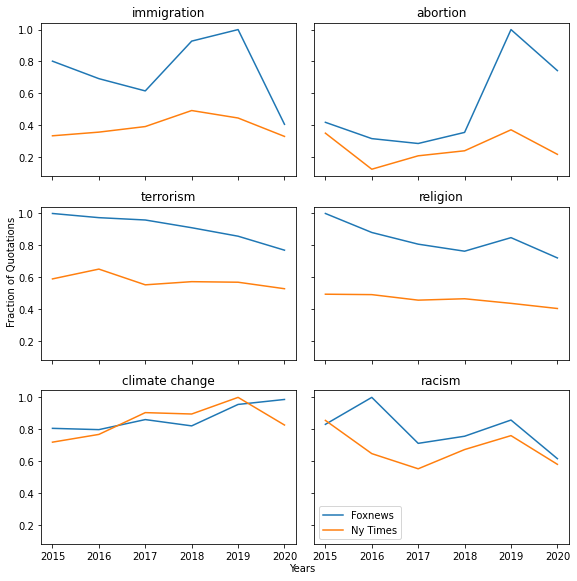

In [ ]:
# Plot of the figure that shows the distribution of the number of quotes per
# year, with the normalized y-axis
fig, ax = plt.subplots(3,2,figsize= (8,8), sharey = True, sharex = True)
count = 0

for i in range (len(lista2)):
    sbplt = ax[i%3, math.floor(i/3)]
    sbplt.plot(years, df_normFox[lista2[count]], label='Foxnews')
    sbplt.plot(years, df_normNy[lista2[count]], label='Ny Times')
    sbplt.set_title(lista2[count])
    count += 1
fig.tight_layout()

plt.legend()
fig.text(0.49,0, 'Years')
fig.text(0,0.43, 'Fraction of Quotations', rotation = 90)

# Democrats VS Republicans number of quotes per year

In [ ]:
# Reading the data and computing the percentage of quotes for specific 
# politicians per newspaper and per year. The percentage of quotes is done by 
# dividing the number of quotes of a particular speaker by the total number of 
# quotes of the newspaper. This allows a comparaison between the two newspapers

years = [2015, 2016, 2017, 2018, 2019, 2020]
PATH = '/content/drive/Shareddrives/ADA/Quotations_Fox_NY/'

lista2 = ['trump', 'obama', 'biden', 'hilary']
# Initialisation of the DataFrames
df_citedFox = pd.DataFrame(index=range(len(years)), columns=lista2)
df_citedNy = pd.DataFrame(index=range(len(years)), columns=lista2)
count = 0

for y in years: # Reading the data for each year
  df_yfox = pd.read_pickle(PATH+str(y)+'_'+'Fox_quotations.pkl')
  df_yNy = pd.read_pickle(PATH+str(y)+'_'+'NY_quotations.pkl')
  df_yfox = df_yfox.str.lower()
  df_yNy = df_yNy.str.lower()

  count2 = 0
  for l in lista2:
    citedFox = len(df_yfox[df_yfox.str.contains(l) == True])/len(df_yfox)*100
    df_citedFox.loc[count][l] = citedFox
    citedNy = len(df_yNy[df_yNy.str.contains(l) == True])/len(df_yNy)*100
    df_citedNy.loc[count][l] = citedNy
  df_citedFox.append(df_citedFox)
  df_citedNy.append(df_citedNy)
  count += 1

In [ ]:
# Calculation of the maximum values per category of key words 
df_mean2 = pd.concat([df_citedFox, df_citedNy])
df_max2 = df_mean2.max()
# Normalization of the computed means
df_normFox = df_citedFox/df_max2
df_normNy = df_citedNy/df_max2

Text(0, 0.43, 'Fraction of Quotations')

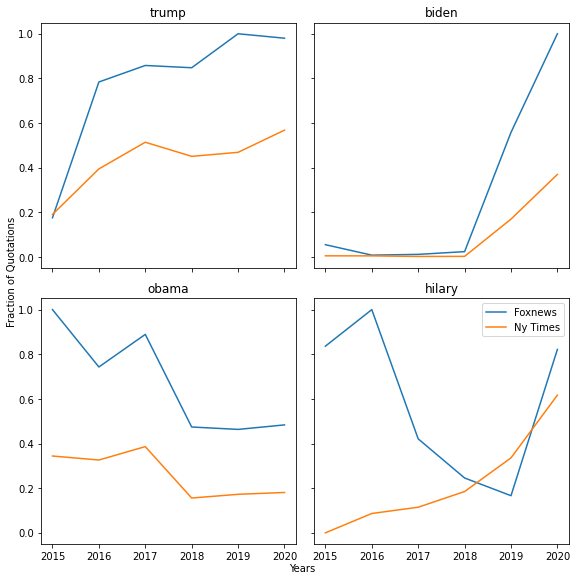

In [ ]:
# Plot of the figure that shows the number of quotes from each newspaper related
# to four most quoted politicians. The y-axis is normalized
fig, ax = plt.subplots(2,2,figsize= (8,8), sharey = True, sharex = True)
count = 0

for i in range (len(lista2)):
    sbplt = ax[i%2, math.floor(i/2)]
    sbplt.plot(years, df_normFox[lista2[count]], label='Foxnews')
    sbplt.plot(years, df_normNy[lista2[count]], label='Ny Times')
    sbplt.set_title(lista2[count])
    count += 1
fig.tight_layout()

plt.legend()
fig.text(0.49,0, 'Years')
fig.text(0,0.43, 'Fraction of Quotations', rotation = 90)